In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py


In [2]:
test = pd.read_csv('test_digit.csv')
train = pd.read_csv('train_digit.csv')
target = train['label']
train.drop('label',axis= 1, inplace = True)

In [3]:
#Lets scale the values
train_scaled = StandardScaler().fit_transform(train)
pca2 = PCA(n_components=100)
X_100comp = pca2.fit_transform(train_scaled)

In [4]:
#in this project we want to use dimensionality reduction and PCA to reduce some of the features 
train

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995       0       0       0       0       0       0       0       0       0   
41996       0       0       0       0       0       0       0       0       0   
41997       0       0       0       0       0       0       0       0       0   
41998       0       0       0       0       0       0       0       0       0   
41999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
0           0  ...         0         0         0         0         0   
1           0  ...         0         0         0         0         0   
2           0  ...         0         0         0         0         0   
3           0  ...         0         0         0         0         0   
4           0  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
41995       0  ...         0         0         0         0         0   
41996       0  ...         0         0         0         0         0   
41997       0  ...         0         0         0         0         0   
41998       0  ...         0         0         0         0         0   
41999       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             0         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
41995         0         0         0         0         0  
41996         0         0         0         0         0  
41997         0         0         0         0         0  
41998         0         0         0         0         0  
41999         0         0         0         0         0  

[42000 rows x 784 columns]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_scaled, target,
                                                test_size=0.2,
                                                random_state=10)

In [6]:
#using only 2 dimensions
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


C:\Users\Chris\AppData\Local\Temp/ipykernel_21588/2103047536.py:12: UserWarning:

FixedFormatter should only be used together with FixedLocator



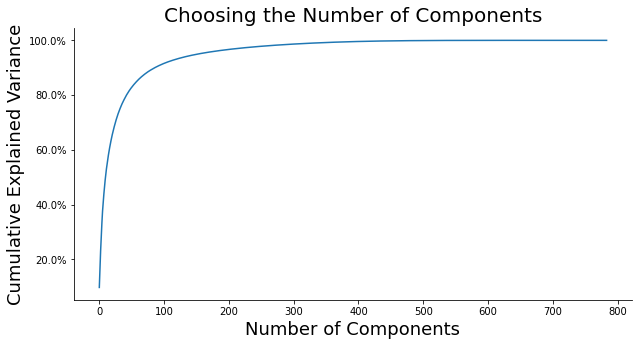

In [7]:
#We need to figure out how many components we actually want to use
#If we look at the cumulative explained variance as a function of the number of components
pca = PCA().fit(train)

fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components',fontsize=18)
plt.ylabel('Cumulative Explained Variance',fontsize=18)
ax.set_title('Choosing the Number of Components',fontsize=20)

# Format y-axis to include percent.
ax.set_yticklabels(['{:.1%}'.format(x) for x in ax.get_yticks().tolist()])

sns.despine(ax=ax)
plt.show()

In [9]:
#It looks like to capture >90% of the variance we will need around 100 components
import plotly.graph_objs as go
import plotly.tools as tls

trace0 = go.Scatter(
    x = X_100comp[:,0],
    y = X_100comp[:,1],
#     name = Target,
#     hoveron = Target,
    mode = 'markers',
    text = target,
    showlegend = False,
    marker = dict(
        size = 8,
        color = target,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [trace0]

layout = go.Layout(
    title= 'Principal Component Analysis (PCA)',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Principal Component',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Principal Component',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= True
)


fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics

svc = SVC()
svc.fit(X_train_pca, y_train);  

y_pred = svc.predict(X_test_pca)   # Predict the response for test dataset

# Model Accuracy: how often is the classifier correct?
print(f'The Digit Recognizer with PCA predicts the correct digit {100*metrics.accuracy_score(y_test, y_pred):.2f}% of the time.')